In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
airbnb_data = pd.read_csv('/content/AB_NYC_2019.csv')
#url = "https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data"

# Explore the structure and statistics of the dataset
print(airbnb_data.head())
print(airbnb_data.describe())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
# Remove duplicates
airbnb_data = airbnb_data.drop_duplicates()

# Convert data types
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'], errors='coerce')
airbnb_data['price'] = pd.to_numeric(airbnb_data['price'], errors='coerce')
airbnb_data['minimum_nights'] = pd.to_numeric(airbnb_data['minimum_nights'], errors='coerce')

# Remove invalid prices
airbnb_data = airbnb_data[airbnb_data['price'] > 0]

# Check missing values
print(airbnb_data.isnull().sum())

# Handle missing values
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)

# Standardize column names
airbnb_data.columns = airbnb_data.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after standardization:\n", airbnb_data.columns)

# Remove invalid prices
airbnb_data = airbnb_data[airbnb_data['price'] > 0]

# Outlier removal (example: price using IQR)
Q1 = airbnb_data['price'].quantile(0.25)
Q3 = airbnb_data['price'].quantile(0.75)
IQR = Q3 - Q1
airbnb_data = airbnb_data[(airbnb_data['price'] >= Q1 - 1.5*IQR) &
                          (airbnb_data['price'] <= Q3 + 1.5*IQR)]

# Quick check
print(airbnb_data.info())
print(airbnb_data.describe())



id                                0
name                              0
host_id                           0
host_name                         0
boroname                          0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
Columns after standardization:
 Index(['id', 'name', 'host_id', 'host_name', 'boroname', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 36734 entries, 0 to 48852
Data columns (

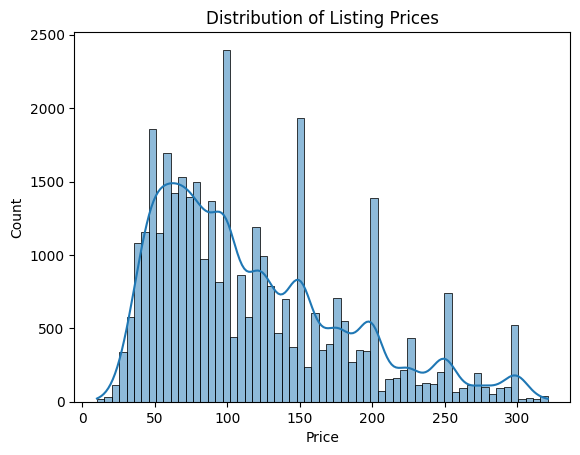

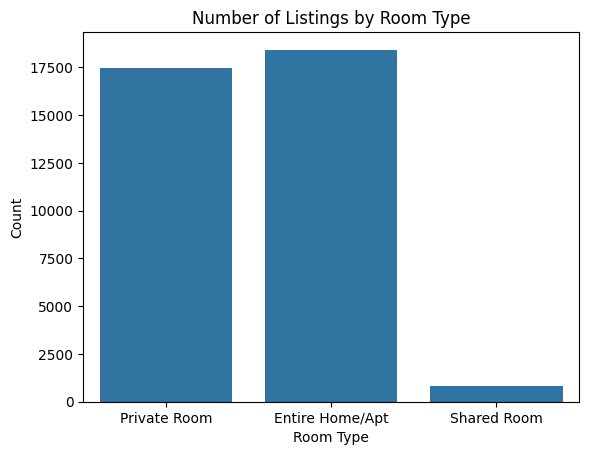

In [ ]:

# Data visualization
sns.histplot(airbnb_data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Listing Prices')
plt.show()

sns.countplot(x='room_type', data=airbnb_data)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()

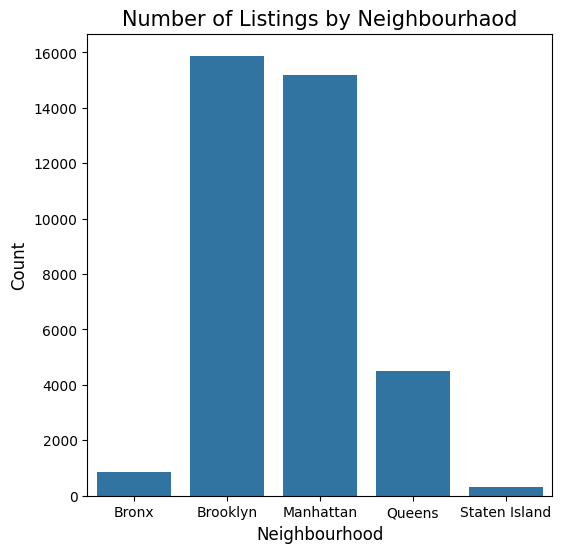

In [ ]:
airbnb_data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
borough_count = airbnb_data.groupby('boroname').agg('count').reset_index()

#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
)
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Neighbourhaod', fontsize=15)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

In [ ]:
!pip install geodatasets
!pip install geopandas


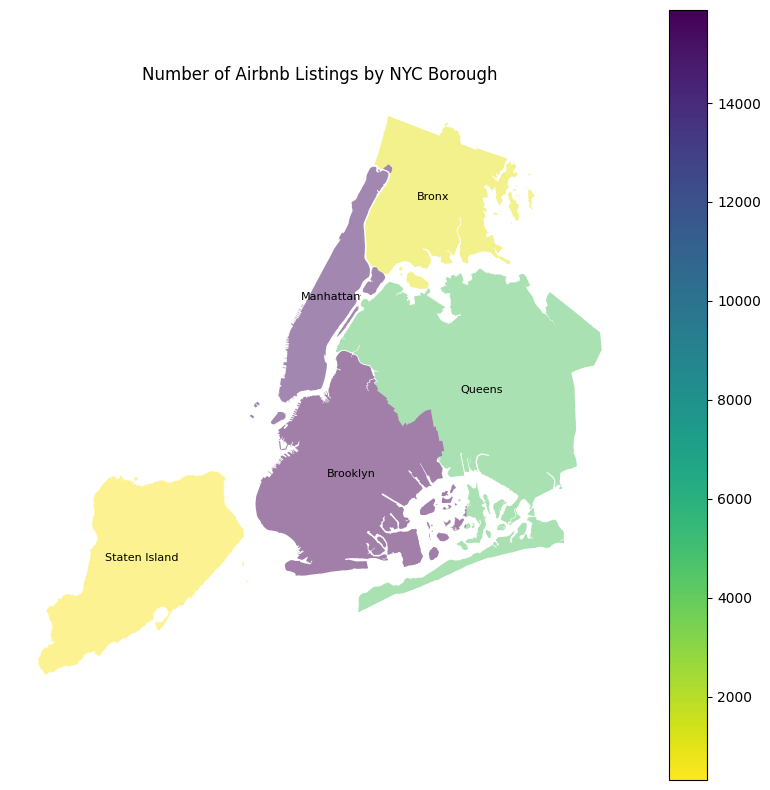

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path

# Load NYC borough boundaries
nyc = gpd.read_file(get_path('nybb'))
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)

# Merge with borough counts (make sure you have borough_count DataFrame)
bc_geo = nyc.merge(borough_count, on='boroname')

# Plot map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)

# Add borough names as annotations
bc_geo.apply(lambda x: ax.annotate(
    text=x.boroname,
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8
), axis=1)

plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')
plt.show()



In [ ]:
# Save cleaned dataset (optional)
airbnb_data.to_excel("AB_NYC_2019_cleaned.xlsx", index=False)

# Download file in Colab
from google.colab import files
files.download("AB_NYC_2019_cleaned.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>